# Assignment Week 2 
Answer each question completely. Include your code and summarize what you see in a brief narrative.

### Charting:
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('car_prices.csv', low_memory=False)

# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- vin: unique identifier of the car. 
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- seller: who sold the car.  
- mmr: estimated wholesale price of the car.  
- sellingprice: actual sales price of the car.  
- saledate: date and time of the sale. 

# Question 1. Determine the number of missing values in each column.

In [110]:
# code
print(f"Number of NaN in each column:\n{df.isnull().sum()}")

Number of NaN in each column:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


The data spans a wide date range from 1982 to 2015 contains no null entries in columns for year, state, seller, mmr, sellingprice, or saledar. However, there are thousands of null entries for make, model, trim, body, transmission, and condition.

# Question 2. Check the data types. Which columns are coded to the incorrect type? If any, correct them.

In [111]:
#code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


_**Table 2**: Propoerties of imported data. Column refers to the names of each data column. Non-Null County refers to the number of data points in each data column that is either float64, int64, or an object variable. Dtype referes to the data storage type for each data data column._

Many of the values in the data were imported as objects when the would be easier to work with as strings, or in the case of saledate as datetime or timestamp.

In [112]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


_**Table 3**: Displays 5 rows of the dataframe. From here it is easy to see that the columns that are shown as object datatypes from Table 2 would be more beneficial stored as strings._ 

# Question 3. Analyze the 'make' column. Comment on what you observe. Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 
Hint: What do you notice if you run this:
```python
# makes = df.make.unique().tolist()
# makes = [str(x).lower() for x in makes]
# sorted(makes)
```

In [113]:
# code
makes = [str(x).lower() for x in df.make.unique()]; print(len(makes))
makes = np.unique(makes); print(len(makes))
for make in makes: print(make)

97
67
acura
airstream
aston martin
audi
bentley
bmw
buick
cadillac
chev truck
chevrolet
chrysler
daewoo
dodge
dodge tk
dot
ferrari
fiat
fisker
ford
ford tk
ford truck
geo
gmc
gmc truck
honda
hummer
hyundai
hyundai tk
infiniti
isuzu
jaguar
jeep
kia
lamborghini
land rover
landrover
lexus
lincoln
lotus
maserati
mazda
mazda tk
mercedes
mercedes-b
mercedes-benz
mercury
mini
mitsubishi
nan
nissan
oldsmobile
plymouth
pontiac
porsche
ram
rolls-royce
saab
saturn
scion
smart
subaru
suzuki
tesla
toyota
volkswagen
volvo
vw


The 'make' column of the dataframe contains many redundant entries. Even after preliminary cleaning where the number of unique values was reduced from 97 to 67, the list of makes presented above retains some inherent redundant names that must be fixed for hardcoding. 

# Question 4. Analyze the relationship between the wholeprice 'mmr' and the sales price. What is the overall correlation? What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [114]:
new = df[df['mmr'].astype(str).str.isdigit()]
new.mmr = new['mmr'].astype('int64')
# new.head(10)
new.info()

C:\Users\meroo\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'pandas.core.frame.DataFrame'>
Int64Index: 558811 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  object 
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(1), int64(3), object(12)
memory usage: 72.5+ MB


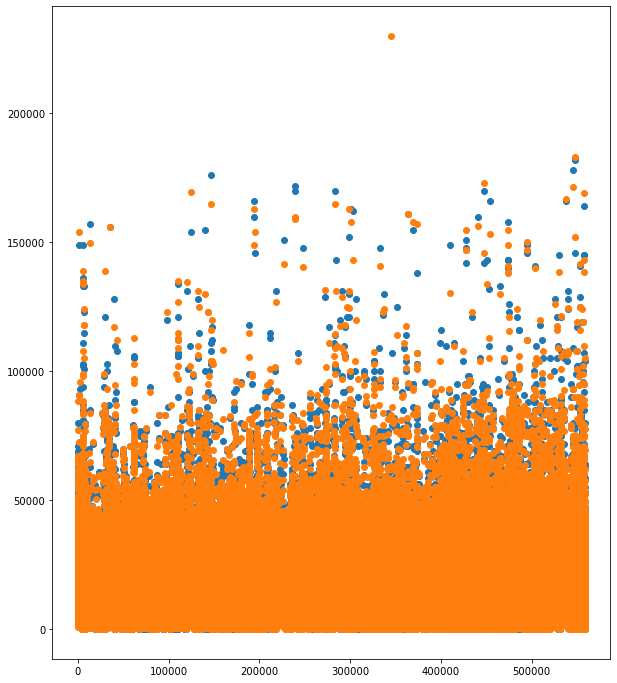

In [115]:
plt.figure(figsize=(10,12))
plt.scatter(new.index, new.mmr)
plt.scatter(new.index, new.sellingprice)
# plt.title("Whole Price vs. Selling Price")
# plt.xlabel("Whole Price")
# plt.ylabel("Selling Price")
plt.show()

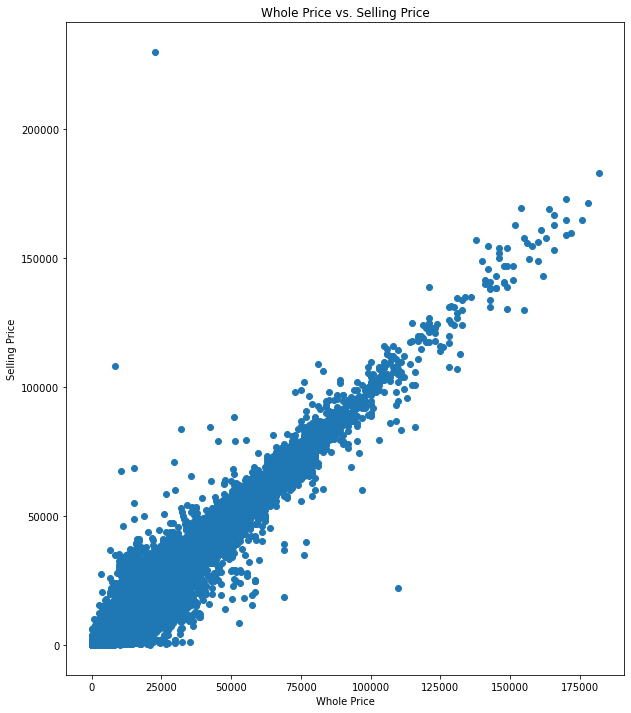

In [116]:
#code 

plt.figure(figsize=(10,12))
plt.scatter(new.mmr, new.sellingprice)
plt.title("Whole Price vs. Selling Price")
plt.xlabel("Whole Price")
plt.ylabel("Selling Price")
plt.show()


_**Figure 2**: Whole Sale price vs. Selling Price from the dataset. There is clearly a linear correlation with mcuh of the data centered around used car prices in the lower price region below 75k_

Not many used cars were sold anywhere near the whole price. 

# Question 5. How does the distribution of sales price vary by make for cars made between 2010-2015? Use the 10 most common makes (your cleaned version of this column). Create a graph that answers this question.

In [121]:
print(f"\n10 most popular use cars sold from years 2010 to 2015:")
freq = df.make.value_counts(); print(freq[0:9])
freq_makes = freq.index[0:9].tolist()
mask_make = df['make'].isin(freq_makes)
mask_year = df['year'].isin(np.arange(2010, 2015, 1))

new = df[mask_make & mask_year]


10 most popular use cars sold from years 2010 to 2015:
Ford         93554
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30710
Honda        27206
Hyundai      21816
BMW          20719
Kia          18077
Name: make, dtype: int64


In [ ]:
# code

plt.figure(figsize=(10,12))
plt.bar(new['makes'], new['sellingprice'])
plt.title("Distribution of Selling Prices for 10 most common cars from 2015-2010")
plt.xlabel("")
plt.ylabel("Selling Price")
plt.show()

Sample narrative description.